# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rn

# Reading Dataset File using Pandas


In [3]:
path = 'LinearRegressionDataset.xlsx'
data = pd.read_excel(path)
data.head()

,52,45,48,70,2,0.1,2.1,50,3,0.1.1,2.2,32,1.94
0,57,90,72,70,1,0.30,1,70,1,0.40,1,32,1.95
1,57,55,43,83,3,0.10,3,65,3,0.15,3,32,1.95
2,57,76,59,82,2,0.15,2,75,1,0.25,2,32,1.95
3,40,30,35,65,2,0.08,3,85,3,0.08,3,32,1.96
4,40,45,35,65,2,0.10,3,35,1,0.10,3,32,1.97


# Creating a Data Frame using pandas

In [4]:
df = pd.DataFrame(data)

# Selecting Inputs and Outputs from my data ( Datas and Labels )

In [5]:
x_inputs = df.iloc[:, :-1].values
y_outputs = df.iloc[:, -1].values
print(y_outputs)

[1.95 1.95 1.95 1.96 1.97 1.97 2.   2.   2.   2.01 2.02 2.04 2.04 2.05
 2.05 2.07 2.09 2.09 2.1  2.1  2.13 2.13 2.13 2.15 2.15 2.15 2.15 2.16
 2.18 2.18 2.18 2.18 2.19 2.2  2.2  2.22 2.22 2.24 2.24 2.24 2.24 2.24
 2.25 2.25 2.25 2.27 2.27 2.27 2.3  2.3  2.3  2.32 2.32 2.32 2.32 2.32
 2.32 2.32 2.33 2.33 2.33 2.33 2.33 2.35 2.36 2.36 2.36 2.37 2.37 2.37
 2.37 2.37 2.39 2.39 2.39 2.4  2.4  2.42 2.42 2.42 2.42 2.43 2.43 2.44
 2.44 2.44 2.44 2.45 2.45 2.45 2.46 2.46 2.46 2.46 2.47 2.47 2.47 2.48
 2.48 2.49 2.49 2.49 2.49 2.5  2.5  2.51 2.51 2.51 2.51 2.51 2.52 2.53
 2.54 2.54 2.54 2.54 2.54 2.55 2.55 2.56 2.56 2.56 2.56 2.56 2.56 2.57
 2.57 2.57 2.58 2.58 2.58 2.58 2.58 2.58 2.58 2.59 2.59 2.59 2.59 2.59
 2.59 2.59 2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.6  2.61 2.61 2.63 2.63
 2.63 2.63 2.64 2.64 2.64 2.64 2.65 2.66 2.66 2.66 2.66 2.66 2.66 2.66
 2.66 2.66 2.66 2.66 2.66 2.67 2.67 2.67 2.67 2.67 2.68 2.68 2.68 2.7
 2.7  2.7  2.7  2.7  2.71 2.71 2.74 2.74 2.74 2.95 3.   3.   3.04 3.06
 3.06 3

# Data Normalization Using Z-Score Method

In [6]:
x_mean = np.mean(x_inputs, axis=0)
x_std = np.std(x_inputs, axis=0)

x_inputs = (x_inputs - x_mean) / x_std

In [7]:
x_inputs

array([[ 0.17917811,  0.867049  ,  1.18649426, ...,  1.02201192,
        -0.6500021 , -0.96974087],
       [ 0.17917811, -1.89602977, -1.88905233, ..., -1.06271025,
         2.57797443, -0.96974087],
       [ 0.17917811, -0.23818251, -0.19219904, ..., -0.22882138,
         0.96398617, -0.96974087],
       ...,
       [ 1.52531111,  1.26177454,  1.18649426, ...,  4.35756741,
        -0.6500021 ,  1.03120332],
       [-0.43270052,  1.02493921,  1.18649426, ...,  0.60506749,
        -0.6500021 ,  1.03120332],
       [-0.43270052,  0.867049  ,  1.18649426, ..., -0.64576582,
        -0.6500021 ,  1.03120332]])

# Adding Bias Terms to input data

In [8]:
x_inputs = np.hstack([np.ones((x_inputs.shape[0], 1)), x_inputs])

In [9]:
x_inputs

array([[ 1.        ,  0.17917811,  0.867049  , ...,  1.02201192,
        -0.6500021 , -0.96974087],
       [ 1.        ,  0.17917811, -1.89602977, ..., -1.06271025,
         2.57797443, -0.96974087],
       [ 1.        ,  0.17917811, -0.23818251, ..., -0.22882138,
         0.96398617, -0.96974087],
       ...,
       [ 1.        ,  1.52531111,  1.26177454, ...,  4.35756741,
        -0.6500021 ,  1.03120332],
       [ 1.        , -0.43270052,  1.02493921, ...,  0.60506749,
        -0.6500021 ,  1.03120332],
       [ 1.        , -0.43270052,  0.867049  , ..., -0.64576582,
        -0.6500021 ,  1.03120332]])

# Split the data into training and testing sets (70% training, 30% testing)

In [10]:
train_size = int(0.7 * len(x_inputs))
x_train, x_test = x_inputs[:train_size], x_inputs[train_size:]
y_train, y_test = y_outputs[:train_size], y_outputs[train_size:]

# Initialize model parameters 

In [11]:
theta = np.zeros(x_train.shape[1])

In [12]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Learning Rate and Epochs

In [13]:
alpha = 0.01
iterations = 1000

__Compute Cost function Using Mean Squared Error ( MSE )__


In [14]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

__Define Gradient Descent Function__ 

In [15]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        costs.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return theta, costs

# Model Training
Using Gradient Descent Function

In [16]:
theta, costs = gradient_descent(x_train, y_train, theta, alpha, iterations)

Iteration 0, Cost: 3.0010373654679214
Iteration 100, Cost: 0.45769712611418095
Iteration 200, Cost: 0.13229542712709158
Iteration 300, Cost: 0.060784676147787986
Iteration 400, Cost: 0.04044622342438505
Iteration 500, Cost: 0.032920366711552795
Iteration 600, Cost: 0.029452182668049824
Iteration 700, Cost: 0.027579483475873714
Iteration 800, Cost: 0.026445857828262424
Iteration 900, Cost: 0.025698594495569438


Evaluate Model on test data to get results

In [17]:
def predict(X, theta):
    return X.dot(theta)

In [18]:
y_pred = predict(x_test, theta)

__Calculating Test Data MSE__

In [19]:
mse = np.mean((y_pred - y_test)**2)
print(f'MSE: {mse}')

MSE: 0.9866396715875905


# Plotting
__Cost Function over Iterations__

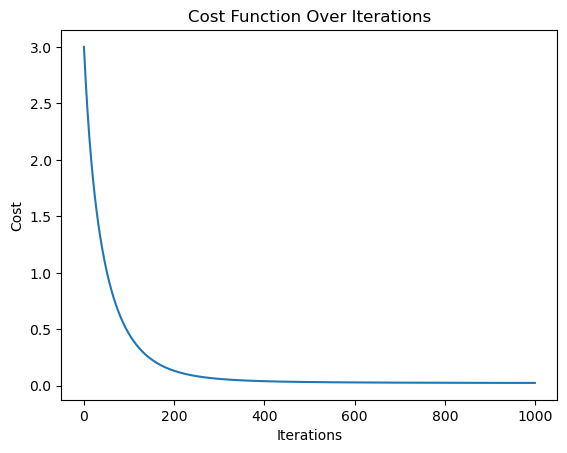

In [20]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

__True Values vs Predicted Values__

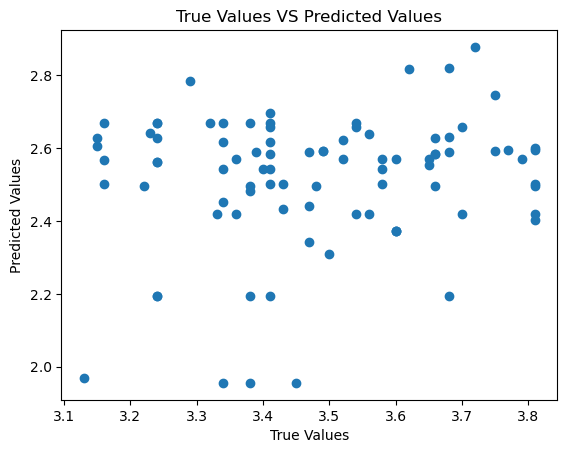

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values VS Predicted Values')
plt.show()

__Printing Fincal Model Parameters__

In [22]:
print('Final Model weights:', theta)

Final Model weights: [ 2.48011829 -0.02580709  0.1046429   0.00919458 -0.01460465 -0.02928548
 -0.19557183 -0.07929974  0.01668593  0.02869368  0.01125196  0.02117182
  0.07404123]
